In [13]:
# %sh

# # echo "Before update: "
# # python --version
# # pip freeze | grep pandas
# # wget http://repo.continuum.io/archive/Anaconda2-4.0.0-Linux-x86_64.sh
# # bash Anaconda2-4.0.0-Linux-x86_64.sh
# # pip install pandas
# echo "After update: "
# python --version
# pip freeze | grep pandas

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# %sh 

# wget https://raw.githubusercontent.com/pmk2109/DataQuest/master/Guided%20Project-%20Visualizing%20Pixar\'s%20Roller%20Coaster/PixarMovies.csv

In [16]:
pixar_movies = pd.read_csv("PixarMovies.csv")
pixar_movies.shape

(15, 16)

In [17]:
pixar_movies.head(15)

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5.0,2.0


In [18]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

In [19]:
pixar_movies.describe()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,133.400000,2.857143,0.785714
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,59.696614,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,91.000000,1.000000,0.000000
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,150.000000,3.000000,1.000000
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,182.500000,4.750000,1.000000
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


In [20]:
# Data cleaning
pixar_movies["Domestic %"] = pixar_movies["Domestic %"].str.rstrip("%").astype("float")
pixar_movies["International %"] = pixar_movies["International %"].str.rstrip("%").astype("float")
pixar_movies["IMDB Score"] = pixar_movies["IMDB Score"] * 10

# Filtered N.A. data
filtered_pixar = pixar_movies.dropna()

# Set column Movie as index
filtered_pixar.set_index("Movie", inplace=True)

# Check results
print("Pixar movies shape: {0} rows x {1} columns".format(pixar_movies.shape[0], pixar_movies.shape[1]))
print("Filtered Pixar movies shape: {0} rows x {1} columns".format(filtered_pixar.shape[0], filtered_pixar.shape[1]))
filtered_pixar.head(3)

Pixar movies shape: 15 rows x 16 columns
Filtered Pixar movies shape: 14 rows x 15 columns


,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0
A Bug's Life,1998,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0
Toy Story 2,1999,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0


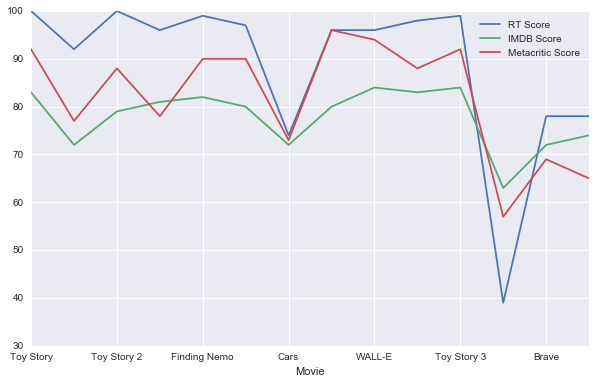

In [21]:
scores = ["RT Score", "IMDB Score", "Metacritic Score"]
critics_reviews = filtered_pixar[scores]

# Generate line plot
critics_reviews.plot(figsize=(10, 6))
plt.show()

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


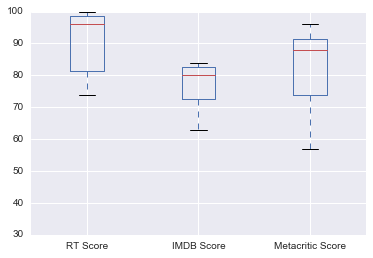

In [22]:
# Generate box plot
critics_reviews.boxplot(figsize=(10,6))
plt.show()

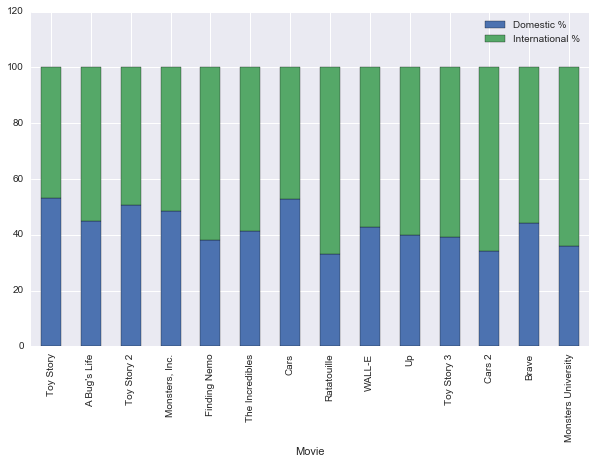

In [23]:
revenue = ["Domestic %", "International %"]
revenue_proportions = filtered_pixar[revenue]

# Generate stack bar plot
revenue_proportions.plot(kind="bar", figsize=(10,6), stacked=True)
plt.show()